In [8]:
#All the important Libraries
import pandas as pd
import numpy as np
#The Data File
df = pd.read_csv('price-range-of-hdb-flats-offered.csv')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import OneHotEncoder

In [3]:
# create a pandas DataFrame from the data
df = pd.DataFrame(df)

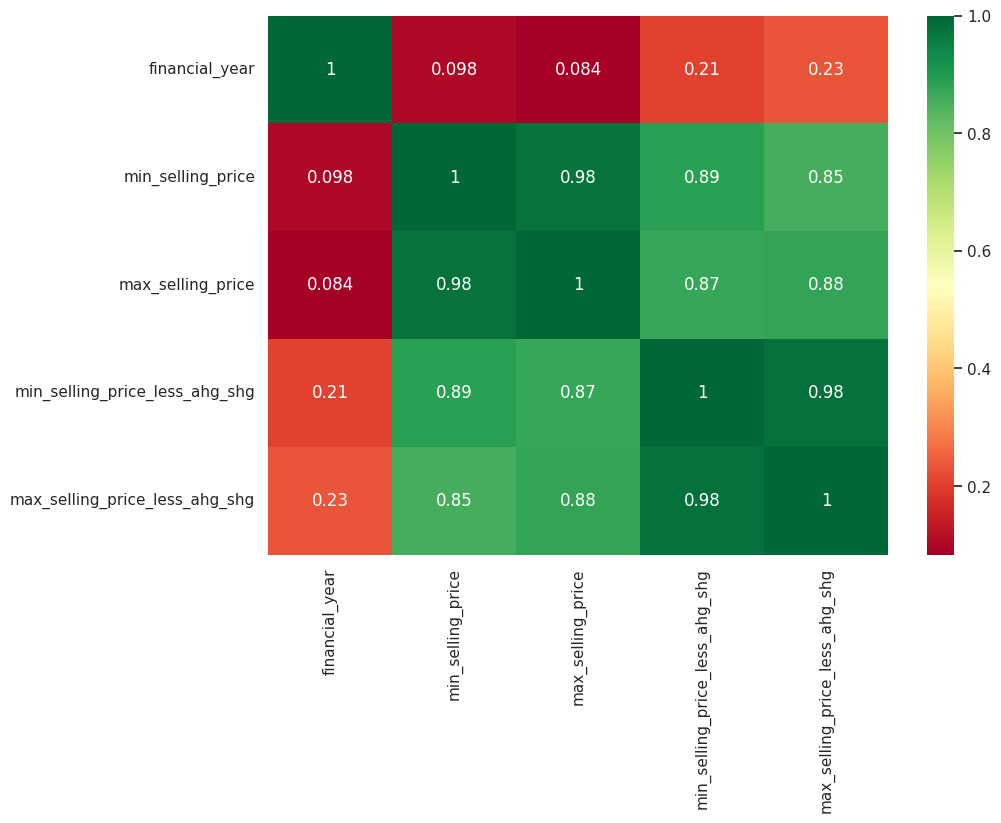

In [4]:
#Correlation map that shows the relationship between columns
plt.figure(figsize=(10,7))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

array([[<Axes: title={'center': 'financial_year'}>,
        <Axes: title={'center': 'min_selling_price'}>],
       [<Axes: title={'center': 'max_selling_price'}>,
        <Axes: title={'center': 'min_selling_price_less_ahg_shg'}>],
       [<Axes: title={'center': 'max_selling_price_less_ahg_shg'}>,
        <Axes: >]], dtype=object)

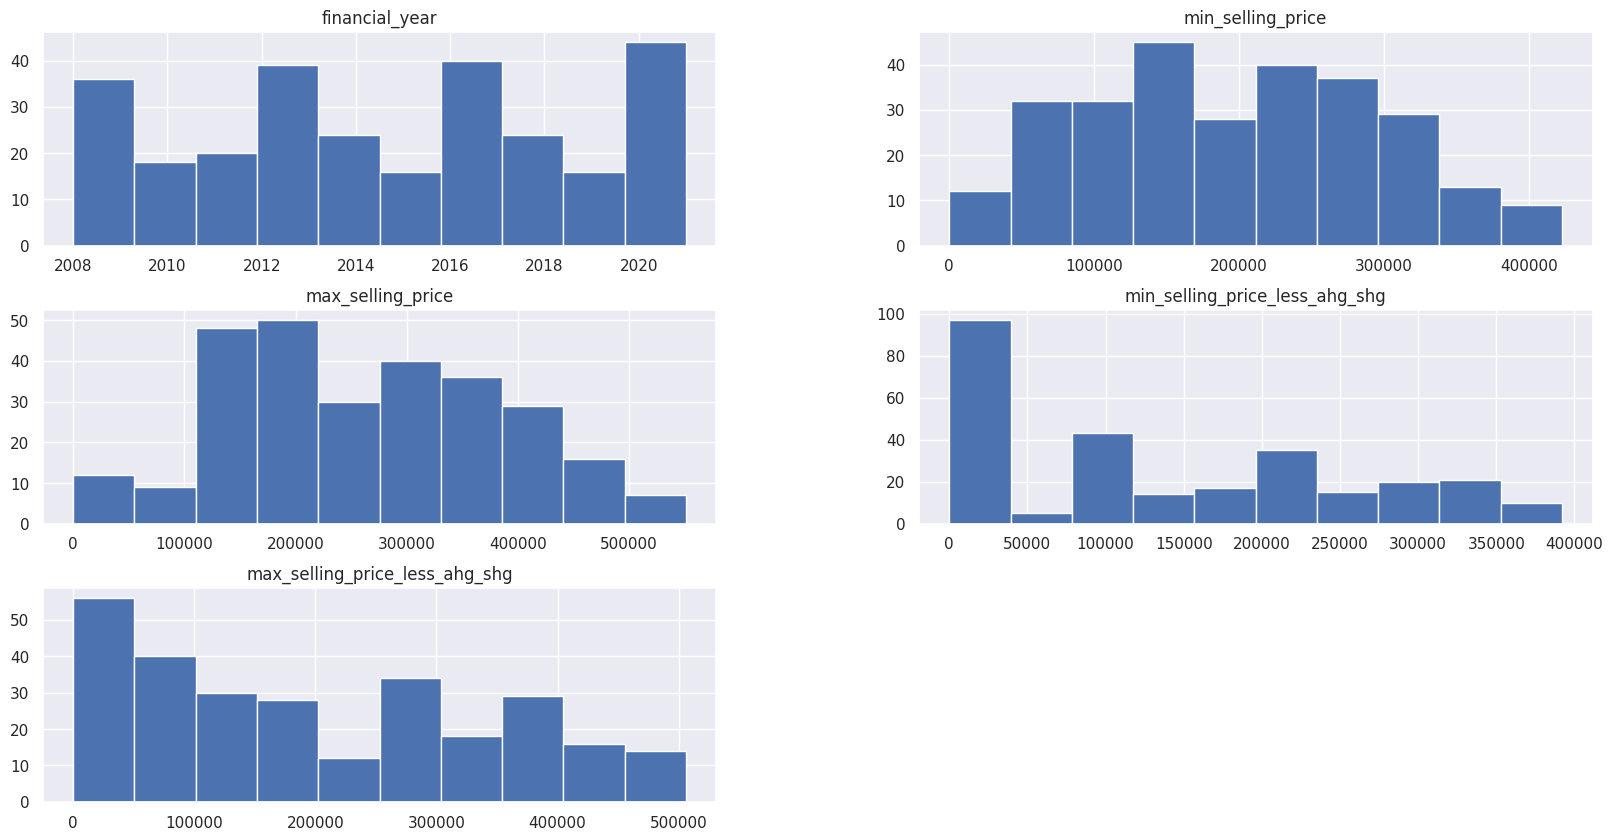

In [5]:
#Histogram that shows the values inside the columns
df.hist(figsize = (20,10))

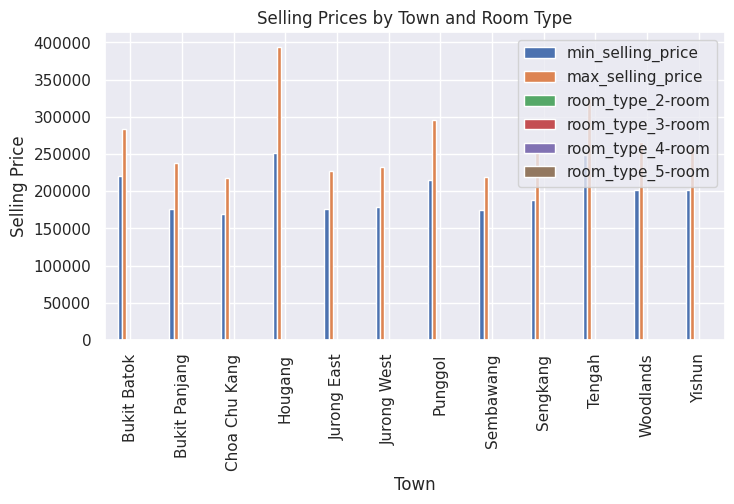

In [9]:
# Extract the "room_type" column
room_type = df['room_type']

# Apply one-hot encoding to "room_type"
encoder = OneHotEncoder()
room_type_encoded = encoder.fit_transform(room_type.values.reshape(-1, 1))

# Add the encoded features back to the DataFrame
room_type_encoded_df = pd.DataFrame(room_type_encoded.toarray(), columns=encoder.get_feature_names_out(['room_type']))
rooms = room_type_encoded_df
df = pd.concat([df, rooms], axis=1)

# Drop the original "room_type" column
df = df.drop('room_type', axis=1)

# Save the modified DataFrame to a new CSV file
df.to_csv('encoded_data.csv', index=False)
# Group the data by town and room type, and calculate the mean selling prices
grouped_data = df.groupby(['town']).mean()[['min_selling_price', 'max_selling_price', 'room_type_2-room', 'room_type_3-room', 'room_type_4-room', 'room_type_5-room']]

# Plot the bar chart
ax = grouped_data.plot(kind='bar', figsize=(8,4))

# Set the x-axis label
ax.set_xlabel('Town')

# Set the y-axis label
ax.set_ylabel('Selling Price')

# Set the title of the chart
ax.set_title('Selling Prices by Town and Room Type')

# Display the chart
plt.show()

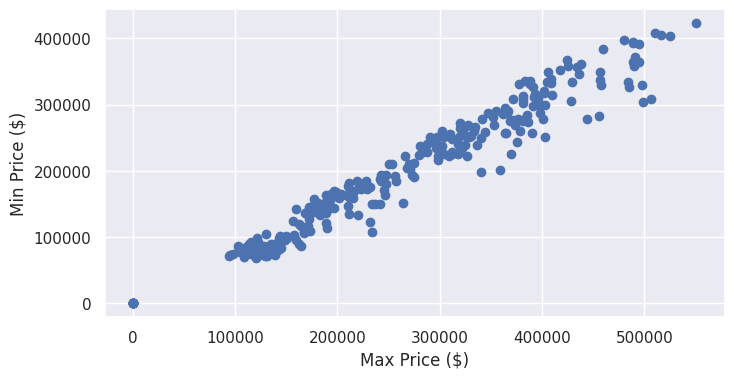

In [10]:
# create the scatter chart
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(df['max_selling_price'], df['min_selling_price'])
ax.set_xlabel('Max Price ($)')
ax.set_ylabel('Min Price ($)')
plt.show()

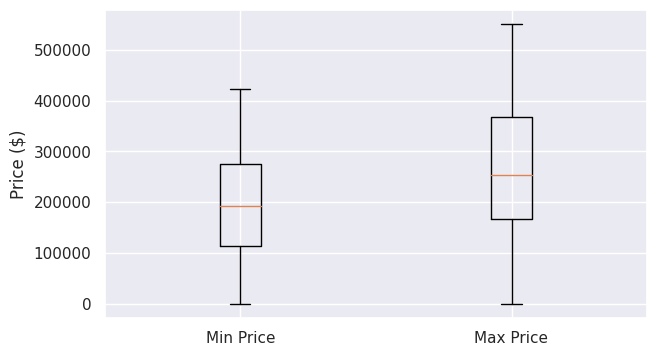

In [11]:
# create the boxplot
fig, ax = plt.subplots(figsize=(7,4))
ax.boxplot([df['min_selling_price'], df['max_selling_price']])
ax.set_xticklabels(['Min Price', 'Max Price'])
ax.set_ylabel('Price ($)')
plt.show()

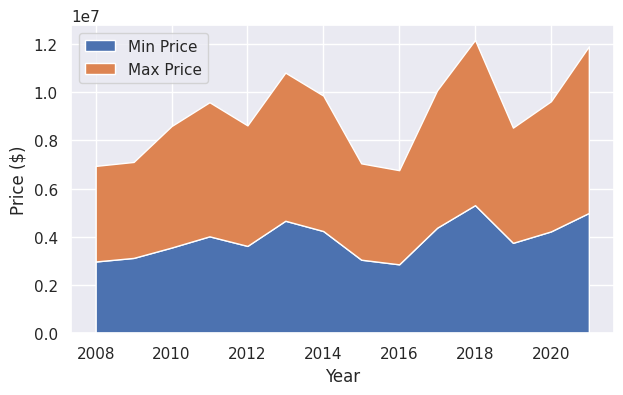

In [12]:
# group the data by year and sum the prices for each category
grouped = df.groupby('financial_year').sum()

# create the stacked area chart
fig, ax = plt.subplots(figsize=(7,4))
ax.stackplot(grouped.index, grouped['min_selling_price'], grouped['max_selling_price'], labels=['Min Price', 'Max Price'])
ax.set_xlabel('Year')
ax.set_ylabel('Price ($)')
ax.legend(loc='upper left')
plt.show()